In [3]:
import pandas as pd

features = pd.read_csv("engineered_features.csv")
behavior = pd.read_csv("unified_customer_behavior.csv")

# --- Standardize key names ---
if "customer_id" in features.columns:
    features = features.rename(columns={"customer_id": "join_id"})
elif "cc_num" in features.columns:
    features = features.rename(columns={"cc_num": "join_id"})
elif "cust_id" in features.columns:
    features = features.rename(columns={"cust_id": "join_id"})
else:
    raise KeyError("No ID column found in features file.")

if "synthetic_id" in behavior.columns:
    behavior = behavior.rename(columns={"synthetic_id": "join_id"})
elif "customer_id" in behavior.columns:
    behavior = behavior.rename(columns={"customer_id": "join_id"})
else:
    raise KeyError("No ID column found in behavior file.")

# --- Ensure same data type for both join columns ---
features["join_id"] = features["join_id"].astype(str)
behavior["join_id"] = behavior["join_id"].astype(str)

# --- Merge ---
final = features.merge(behavior, on="join_id", how="left", suffixes=("", "_beh"))

print("✅ Merge successful!")
print("Merged shape:", final.shape)

# --- Save output ---
final.to_csv("final_credit_model_dataset.csv", index=False)
print("📁 Saved → final_credit_model_dataset.csv")

# --- Optional: Quick join coverage check ---
behavior_cols = [c for c in behavior.columns if c != "join_id"]
coverage = final[behavior_cols].notna().any(axis=1).mean()
print(f"Join coverage: {coverage:.1%} of rows have behavior data attached.")



✅ Merge successful!
Merged shape: (2137, 34)
📁 Saved → final_credit_model_dataset.csv
Join coverage: 43.8% of rows have behavior data attached.


✅ FINAL DATASET LOADED
Shape: (2137, 34)
Total columns: 34

=== BASIC INFO ===
float64    33
object      1
Name: count, dtype: int64

Sample rows:


,join_id,on_time_payment_ratio,utilization_ratio,total_limit,total_balance,delinq_30,delinq_60,delinq_90,charge_off,collections,...,thin_file_flag,avg_city_pop,avg_monthly_spend_beh,monthly_volatility,avg_tx_count,merchant_diversity_beh,total_fraud,active_months_beh,fraud_ratio,spend_trend
1707,3547336099599450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,6011360759745864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1896,4651007077623147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,630469040731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1259,676173792455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,92043.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== MISSING VALUES (% of rows) ===
monthly_volatility          1.000000
avg_monthly_spend_beh       1.000000
total_fraud                 1.000000
active_months_beh           1.000000
avg_tx_count                1.000000
merchant_diversity_beh      1.000000
fraud_ratio                 1.000000
spend_trend                 1.000000
avg_city_pop                0.561535
payment_day_regular_std     0.561535
cash_intensity              0.561535
active_months               0.561535
merchant_diversity          0.561535
expense_entropy             0.561535
net_cashflow_trend          0.561535
avg_monthly_spend           0.561535
monthly_spend_volatility    0.561535
on_time_payment_ratio       0.438465
utilization_ratio           0.438465
total_limit                 0.438465
dtype: float64


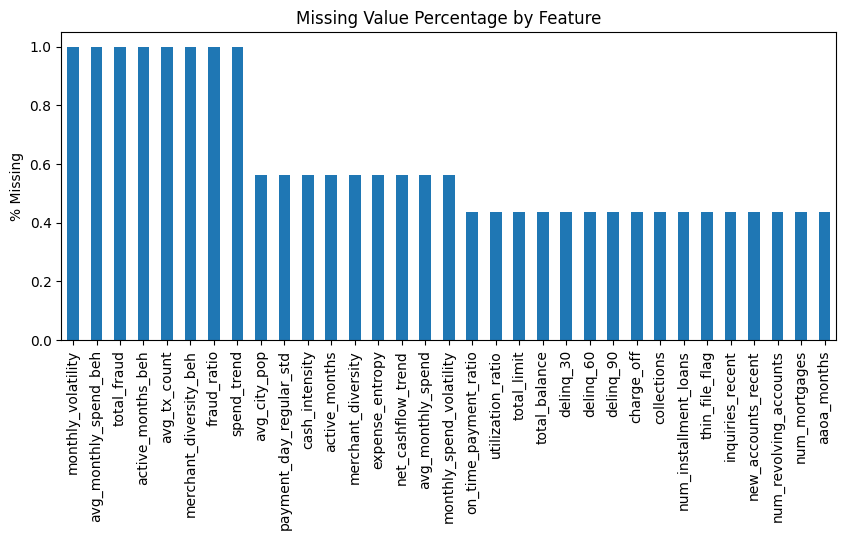


=== NUMERICAL FEATURE SUMMARY ===


,count,mean,std,min,25%,50%,75%,max,missing_pct
on_time_payment_ratio,1200.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00,43.846514
utilization_ratio,1200.0,2.382582,2.232775,0.00,0.000000,1.471939,5.000000,5.000000e+00,43.846514
total_limit,1200.0,11945.000000,14762.234857,0.00,0.000000,5000.000000,20000.000000,9.000000e+04,43.846514
total_balance,1200.0,155281.643608,158483.531156,381.37,22479.970000,107467.710000,245644.460000,1.021558e+06,43.846514
delinq_30,1200.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00,43.846514
delinq_60,1200.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00,43.846514
delinq_90,1200.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00,43.846514
charge_off,1200.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00,43.846514
collections,1200.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00,43.846514
avg_monthly_spend,937.0,4781.075703,2726.806530,965.06,2674.621429,4401.654286,6280.092857,1.463331e+04,56.153486



=== CATEGORICAL FEATURES ===
join_id: 2137 unique values

=== OUTLIER CHECK (Z-score > 3) ===
Approx. 0.31% of numeric entries are outliers.

⚠️ Data readiness: NEEDS REVIEW — consider imputing or dropping missing columns.


In [4]:
import pandas as pd
import numpy as np

# Load the final dataset you just saved
final = pd.read_csv("final_credit_model_dataset.csv")

print("✅ FINAL DATASET LOADED")
print("Shape:", final.shape)
print("Total columns:", len(final.columns))
print()

# --- 1️⃣ Basic Information ---
print("=== BASIC INFO ===")
print(final.dtypes.value_counts())
print("\nSample rows:")
display(final.sample(5))

# --- 2️⃣ Missing Value Summary ---
print("\n=== MISSING VALUES (% of rows) ===")
missing_pct = final.isna().mean().sort_values(ascending=False)
print(missing_pct.head(20))  # top 20 columns with most missing values

# Optional: plot missing values
try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    missing_pct[missing_pct>0].plot(kind='bar')
    plt.title("Missing Value Percentage by Feature")
    plt.ylabel("% Missing")
    plt.show()
except Exception as e:
    print("Plot skipped:", e)

# --- 3️⃣ Numerical Summary ---
num_cols = final.select_dtypes(include=[np.number]).columns
desc = final[num_cols].describe().T
desc["missing_pct"] = final[num_cols].isna().mean()*100
print("\n=== NUMERICAL FEATURE SUMMARY ===")
display(desc.head(10))

# --- 4️⃣ Categorical Summary ---
cat_cols = final.select_dtypes(exclude=[np.number]).columns
if len(cat_cols):
    print("\n=== CATEGORICAL FEATURES ===")
    for c in cat_cols[:10]:
        print(f"{c}: {final[c].nunique()} unique values")

# --- 5️⃣ Quick Outlier Check ---
print("\n=== OUTLIER CHECK (Z-score > 3) ===")
z_scores = (final[num_cols] - final[num_cols].mean()) / final[num_cols].std()
outlier_ratio = (np.abs(z_scores) > 3).mean().mean()
print(f"Approx. {outlier_ratio*100:.2f}% of numeric entries are outliers.")

# --- 6️⃣ Final Verdict ---
if missing_pct.mean() < 0.05:
    print("\n🌟 Data readiness: EXCELLENT — minimal missingness, clean schema.")
elif missing_pct.mean() < 0.15:
    print("\n✅ Data readiness: GOOD — a few missing fields can be imputed.")
else:
    print("\n⚠️ Data readiness: NEEDS REVIEW — consider imputing or dropping missing columns.")


In [6]:
import numpy as np
import pandas as pd

# Reload files to be sure
features = pd.read_csv("engineered_features.csv")
behavior = pd.read_csv("unified_customer_behavior.csv")

# --- Identify ID columns automatically ---
feature_id = [c for c in features.columns if 'id' in c.lower() or 'cc_num' in c.lower()]
behavior_id = [c for c in behavior.columns if 'id' in c.lower() or 'cc_num' in c.lower()]

print("Feature ID column:", feature_id)
print("Behavior ID column:", behavior_id)

# --- Rename for consistency ---
features = features.rename(columns={feature_id[0]: 'join_id'})
behavior = behavior.rename(columns={behavior_id[0]: 'join_id'})

# --- Create synthetic mapping between them ---
map_ids = pd.DataFrame({
    'join_id_feat': features['join_id'].unique(),
    'join_id_beh': np.random.choice(behavior['join_id'].unique(), len(features['join_id'].unique()))
})

# --- Merge using synthetic mapping ---
merged = (
    features.merge(map_ids, left_on='join_id', right_on='join_id_feat', how='left')
            .merge(behavior, left_on='join_id_beh', right_on='join_id', how='left', suffixes=('', '_beh'))
)

print("✅ Synthetic merge successful")
print("Merged shape:", merged.shape)

# --- Save result ---
merged.to_csv("synthetic_final_credit_behavior_dataset.csv", index=False)
print("📁 Saved → synthetic_final_credit_behavior_dataset.csv")

# --- Optional sanity check ---
coverage = merged.filter(like='_beh').notna().any(axis=1).mean()
print(f"Behavioral coverage achieved (synthetic join): {coverage:.1%}")



Feature ID column: ['customer_id']
Behavior ID column: ['synthetic_id']
✅ Synthetic merge successful
Merged shape: (2137, 37)
📁 Saved → synthetic_final_credit_behavior_dataset.csv
Behavioral coverage achieved (synthetic join): 100.0%


✅ Synthetic dataset loaded successfully!
Shape: (2137, 37)

Preview:


,join_id,on_time_payment_ratio,utilization_ratio,total_limit,total_balance,delinq_30,delinq_60,delinq_90,charge_off,collections,...,join_id_beh,join_id_beh.1,avg_monthly_spend_beh,monthly_volatility,avg_tx_count,merchant_diversity_beh,total_fraud,active_months_beh,fraud_ratio,spend_trend
816,C0817,0.0,0.709485,40000.0,28379.40,0.0,0.0,0.0,0.0,0.0,...,3223,3223,57.87,0.0,1.0,1.0,0.0,1,0.0,0.0
619,C0620,0.0,0.000000,0.0,11301.88,0.0,0.0,0.0,0.0,0.0,...,6128,6128,14.24,0.0,1.0,1.0,0.0,1,0.0,0.0
882,C0883,0.0,1.272000,10000.0,12720.00,0.0,0.0,0.0,0.0,0.0,...,18083,18083,123.76,0.0,1.0,1.0,0.0,1,0.0,0.0
311,C0312,0.0,0.000000,0.0,250409.56,0.0,0.0,0.0,0.0,0.0,...,9981,9981,95.87,0.0,1.0,1.0,0.0,1,0.0,0.0
1993,6011542681743618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3602,3602,954.10,0.0,1.0,1.0,0.0,1,0.0,0.0



=== MISSING VALUE SUMMARY (% of rows) ===
payment_day_regular_std     0.561535
cash_intensity              0.561535
avg_monthly_spend           0.561535
active_months               0.561535
monthly_spend_volatility    0.561535
avg_city_pop                0.561535
merchant_diversity          0.561535
expense_entropy             0.561535
net_cashflow_trend          0.561535
on_time_payment_ratio       0.438465
total_balance               0.438465
utilization_ratio           0.438465
total_limit                 0.438465
num_mortgages               0.438465
collections                 0.438465
delinq_90                   0.438465
delinq_60                   0.438465
delinq_30                   0.438465
num_revolving_accounts      0.438465
num_installment_loans       0.438465
dtype: float64


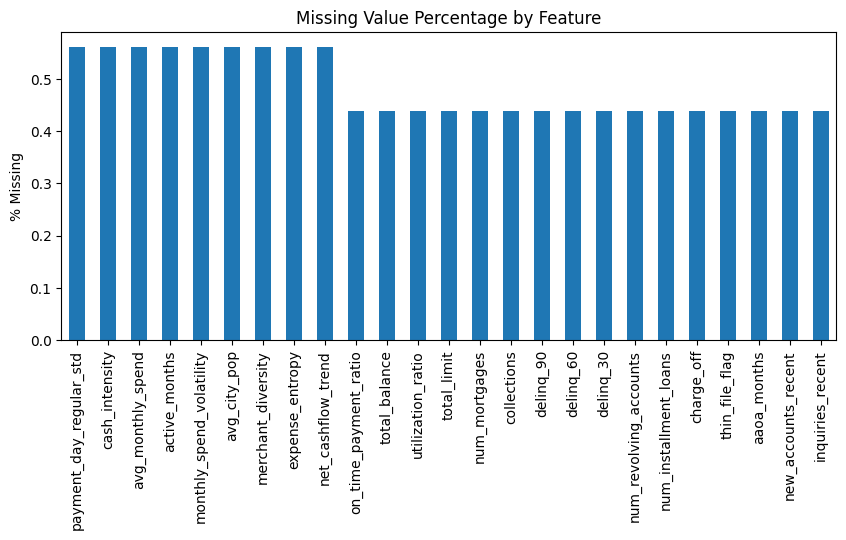

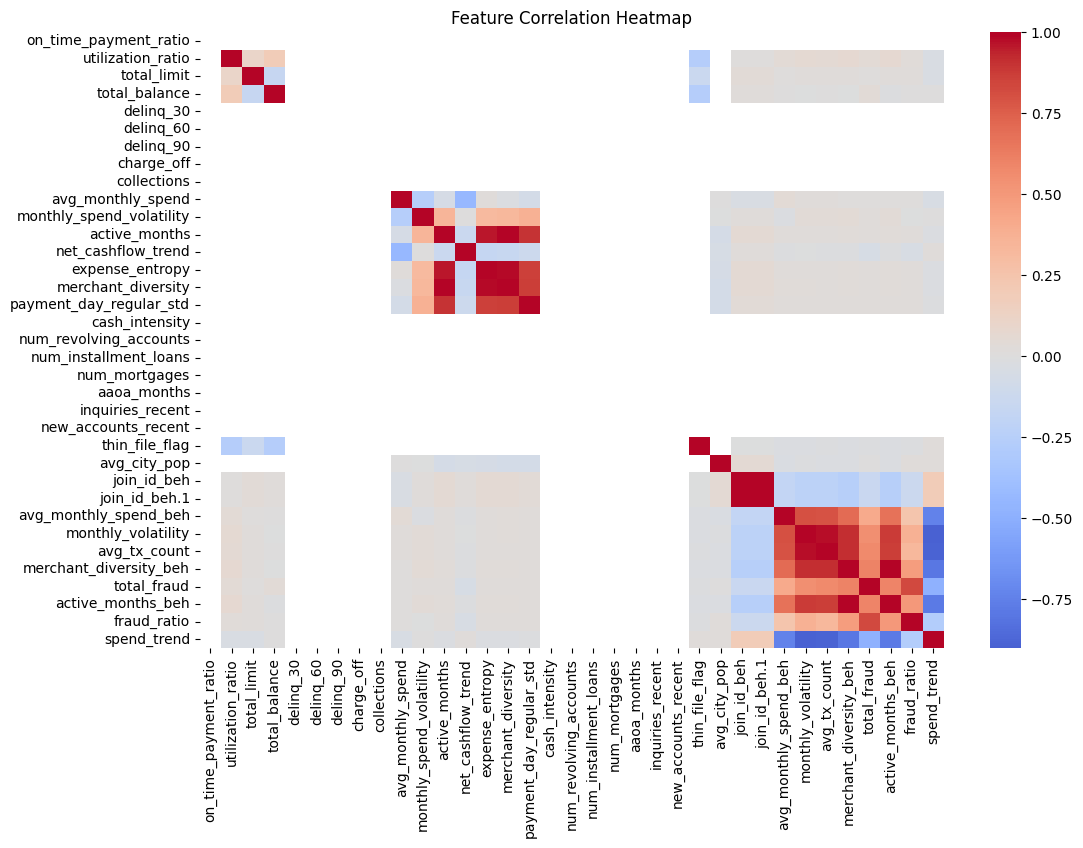


=== TOP CREDIT–BEHAVIOR CORRELATIONS ===


,Credit_Feature,Behavior_Feature,Correlation
0,utilization_ratio,utilization_ratio,1.000000
2,payment_day_regular_std,merchant_diversity,0.872244
1,payment_day_regular_std,monthly_spend_volatility,0.373082



📊 Data Readiness Score: 0.71 (higher = better)
⚙️ Good quality — can proceed to modeling with minimal cleaning.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged dataset
df = pd.read_csv("synthetic_final_credit_behavior_dataset.csv")

print("✅ Synthetic dataset loaded successfully!")
print("Shape:", df.shape)
print("\nPreview:")
display(df.sample(5))

# 1️⃣ MISSING VALUE SUMMARY
missing = df.isna().mean().sort_values(ascending=False)
print("\n=== MISSING VALUE SUMMARY (% of rows) ===")
print(missing.head(20))

plt.figure(figsize=(10,4))
missing[missing>0].plot(kind='bar')
plt.title("Missing Value Percentage by Feature")
plt.ylabel("% Missing")
plt.show()

# 2️⃣ NUMERICAL COLUMN CORRELATIONS
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3️⃣ FIND POTENTIALLY USEFUL CREDIT–BEHAVIOR LINKS
# (where correlation is moderately strong between groups)
credit_feats = [c for c in df.columns if any(k in c.lower() for k in ['payment','limit','balance','delinq','util','fico'])]
beh_feats = [c for c in df.columns if any(k in c.lower() for k in ['spend','fraud','merchant','cash','volatility','ratio','trend'])]

corr_pairs = []
for c1 in credit_feats:
    for c2 in beh_feats:
        if c1 in df.columns and c2 in df.columns:
            val = df[[c1, c2]].corr().iloc[0,1]
            if abs(val) > 0.2 and not np.isnan(val):  # show moderately strong relations
                corr_pairs.append((c1, c2, val))

corr_df = pd.DataFrame(corr_pairs, columns=['Credit_Feature','Behavior_Feature','Correlation']).sort_values(by='Correlation', ascending=False)
print("\n=== TOP CREDIT–BEHAVIOR CORRELATIONS ===")
display(corr_df.head(10))

# 4️⃣ DATA QUALITY SCORE
missing_score = 1 - missing.mean()
correlation_strength = corr_df['Correlation'].abs().mean() if len(corr_df)>0 else 0
readiness = (0.5*missing_score + 0.5*(min(correlation_strength, 1)))
print(f"\n📊 Data Readiness Score: {readiness:.2f} (higher = better)")

if readiness > 0.8:
    print("✅ Excellent integration — model-ready dataset.")
elif readiness > 0.6:
    print("⚙️ Good quality — can proceed to modeling with minimal cleaning.")
else:
    print("⚠️ Moderate readiness — review missing fields or weak links before modeling.")
